In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cleaned_n_moviess.csv")
df.head()

,Title,Genre,Rating,Year,Description,Votes,Certificate,Duration
0,Cobra Kai,"Action, Comedy, Drama",8.5,2018,Decades after their 1984 All Valley Karate Tou...,177031,TV-14,30
1,The Crown,"Biography, Drama, History",8.7,2016,Follows the political rivalries and romance of...,199885,TV-MA,58
2,Better Call Saul,"Crime, Drama",8.9,2015,The trials and tribulations of criminal lawyer...,501384,TV-MA,46
3,Devil in Ohio,"Drama, Horror, Mystery",5.9,2022,When a psychiatrist shelters a mysterious cult...,9773,TV-MA,356
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",8.6,2022,A Street Kid trying to survive in a technology...,15413,TV-MA,24


In [3]:
# Summary statistics for numerical columns
df.describe()


,Rating,Year,Votes,Duration
count,9945.000000,9945.000000,9.945000e+03,9945.000000
mean,6.764138,2015.822021,1.724399e+04,72.393464
std,1.141525,8.370163,8.254568e+04,44.956633
min,1.700000,1932.000000,0.000000e+00,1.000000
25%,6.200000,2015.000000,1.310000e+02,46.000000
50%,6.764138,2018.000000,8.440000e+02,67.000000
75%,7.500000,2020.000000,4.271000e+03,93.000000
max,9.900000,2025.000000,1.844075e+06,990.000000


In [4]:
# Frequency count for categorical columns
df['Genre'].value_counts()

Genre
Comedy                             858
Drama                              587
Animation, Action, Adventure       553
Documentary                        517
Comedy, Drama                      284
                                  ... 
Documentary, Adventure, History      1
Drama, Horror, Romance               1
Animation, Action, Mystery           1
Comedy, Fantasy, Reality-TV          1
News, Reality-TV                     1
Name: count, Length: 570, dtype: int64

In [5]:
df['Certificate'].value_counts()

Certificate
Unrated      3508
TV-MA        2517
TV-14        1209
TV-PG         543
R             472
Not Rated     467
TV-Y7         348
PG-13         282
TV-Y          175
PG            159
TV-G          151
G              43
TV-Y7-FV       31
Approved       26
Passed          6
NC-17           4
MA-17           1
12              1
M               1
E10+            1
Name: count, dtype: int64

 Visualizing the Data:

Genre Frequency:

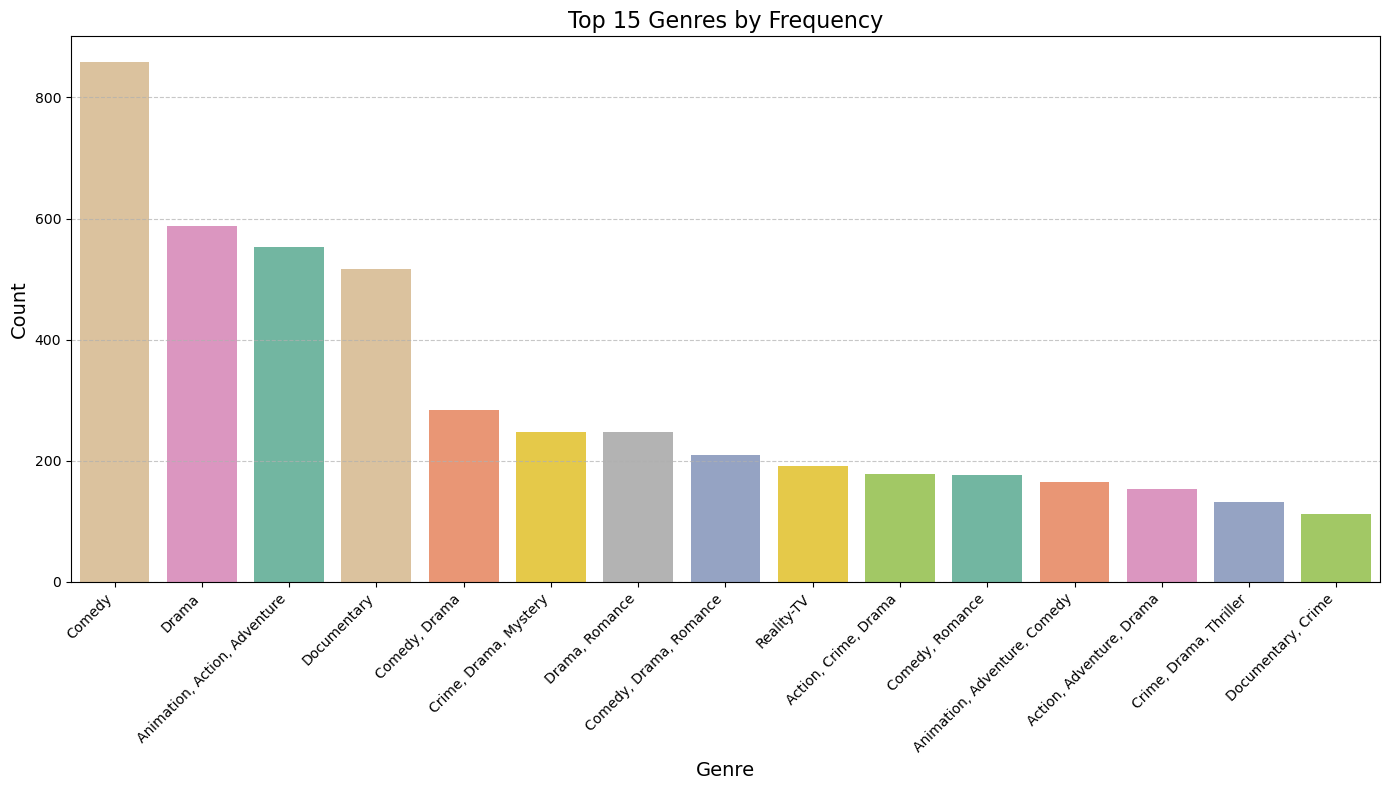

In [8]:

# Get the top N most frequent genres
top_n = 15
top_genres = df['Genre'].value_counts().nlargest(top_n).index

# Filter the dataframe to only include top N genres
filtered_df = df[df['Genre'].isin(top_genres)]

# Create the countplot
plt.figure(figsize=(14, 8))
sns.countplot(x='Genre', data=filtered_df, hue='Genre', palette="Set2", order=top_genres, legend=False)

# Title and labels
plt.title(f"Top {top_n} Genres by Frequency", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Distribution of Ratings:

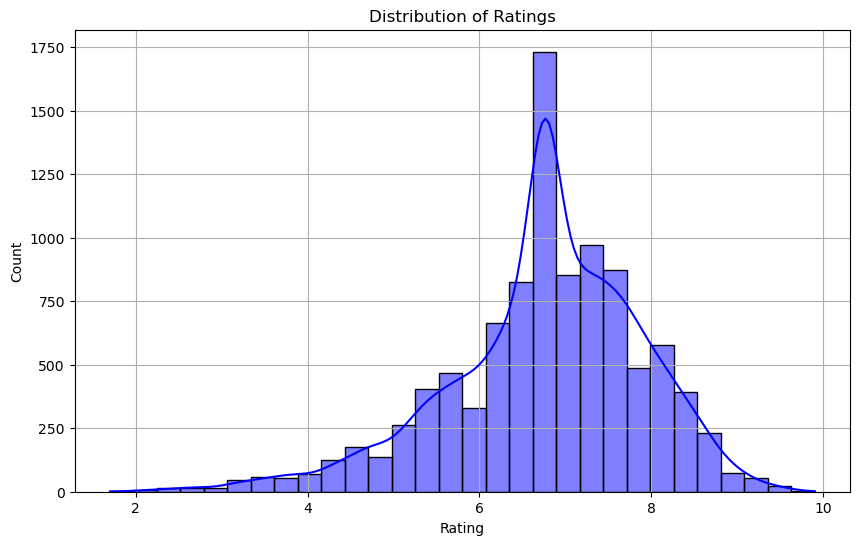

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Relationship between the Year and Rating

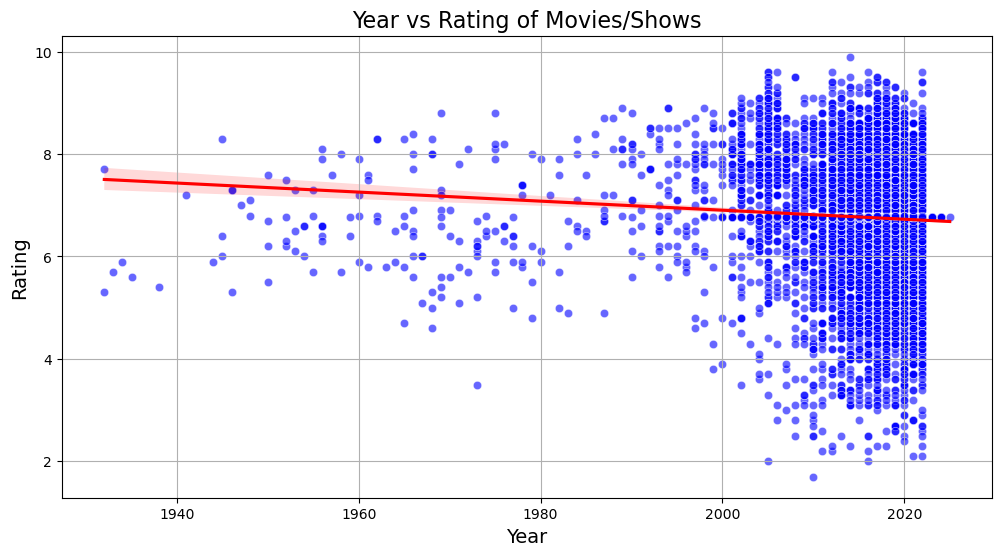

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Year vs Rating
plt.figure(figsize=(12, 6))

# Scatter plot for Year vs Rating
sns.scatterplot(data=df, x='Year', y='Rating', color='blue', alpha=0.6)

# Optional: Add a regression line to see the trend
sns.regplot(data=df, x='Year', y='Rating', scatter=False, color='red')

# Title and labels
plt.title('Year vs Rating of Movies/Shows', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

 Year of Release:

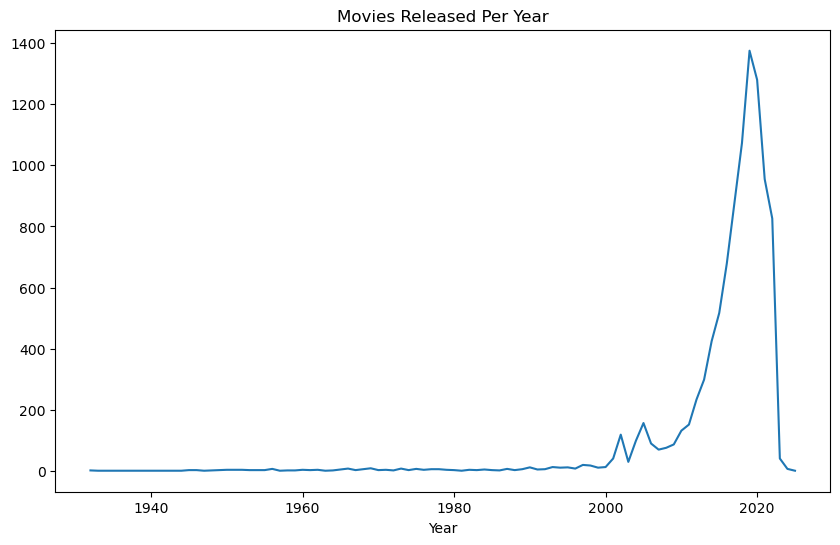

In [15]:
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Movies Released Per Year')
plt.show()

4. Correlation Analysis:

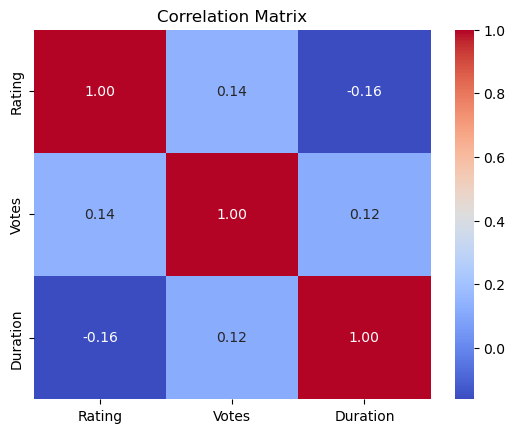

In [17]:
correlation_matrix = df[['Rating', 'Votes', 'Duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

5. Trends Over Time:

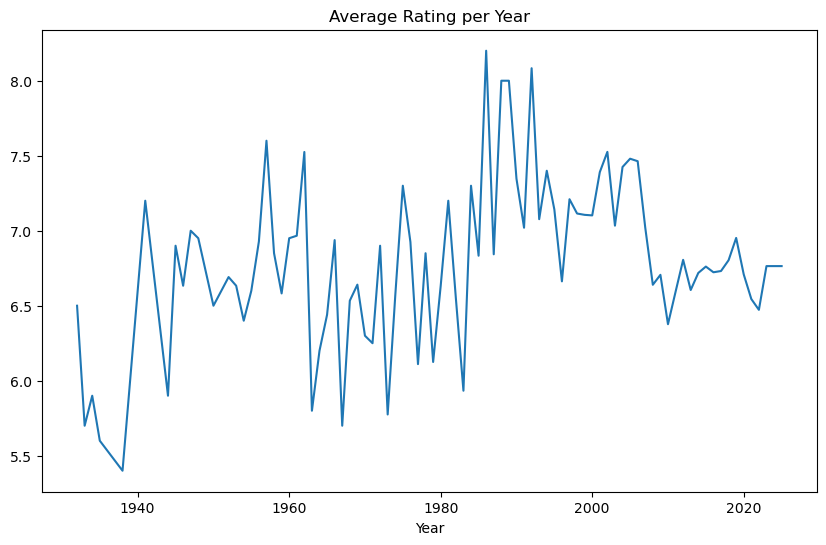

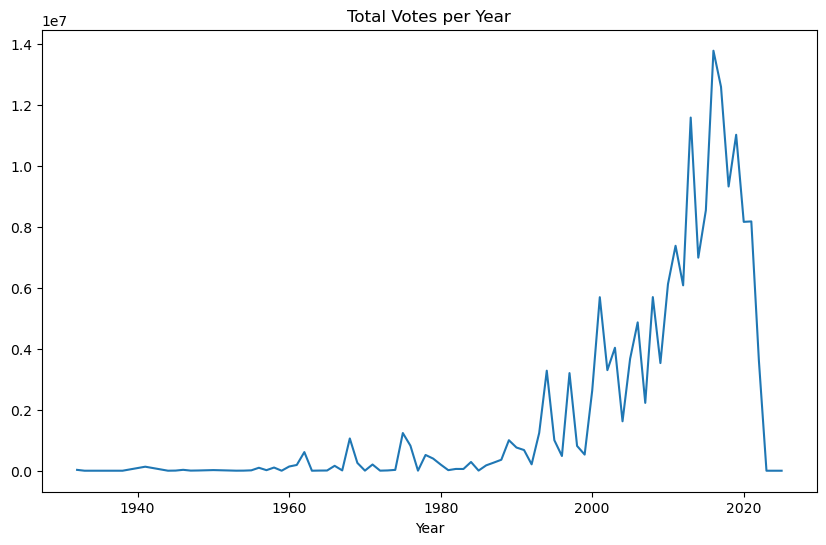

In [19]:
#Rating vs year
df.groupby('Year')['Rating'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Rating per Year')
plt.show()

# Votes over year
df.groupby('Year')['Votes'].sum().plot(kind='line', figsize=(10, 6))
plt.title('Total Votes per Year')
plt.show()